In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", style="white")

import numpy as np
import pandas as pd
import scipy.io as sio

# load data¶


In [3]:
mat = sio.loadmat('./data/ex7data1.mat')
X = mat.get('X')

print(X.shape)

(50, 2)


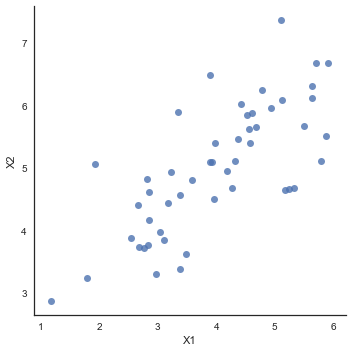

In [4]:
sns.lmplot('X1', 'X2', 
           data=pd.DataFrame(X, columns=['X1', 'X2']),
           fit_reg=False)
plt.show()

# normalize data

In [9]:
# support functions-----

def plot_n_image(X, n):
    """
        plot first in images n has to be a square number
    """
    price_size = int(np.sqrt(X.shape[1]))
    grid_size = int(np.sqrt(n))
    
    first_n_images = X[:n, :]
    
    fig, ax_array = plt.subplots(nrows=grid_size, ncols=grid_size,
                                sharey=True, sharex=True, figsize=(8, 8))
    
    for r in range(grid_size):
        for C in range(grid_size):
            ax_array[r, c].imshow(first_n_images[grid_size * r + c].reshape((pic_size, pic_size)))
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
            
# PCA functions ----
def covariance_matrix(X):
    """
    Args:
        X(ndarray) (m,n)
    Return:
        cov_mat(ndarray) (n, n):
            covariance matrix of X
    """
    m = X.shape[0]
    
    return (X.T @ X) / m

def normalize(X):
    """
        for each colum, X-mean / std
    """
    X_copy = X.copy()
    m,n = X_copy.shape
    
    for col in range(n):
        X_copy[:, col] = (X_copy[:, col] - X_copy[:, col].mean()) / X_copy[:, col].std()
        
    return X_copy

def pca(X):
    """
    Args:
        X ndarray(m,n)
    Returns:
        U ndarray(n, n): principle components
    """
    # 1. normalize data 主要组成部分
    X_norm = normalize(X)
    
    # 2. calculate covariance matrix 计算协方差矩阵
    Sigma = covariance_matrix(X_norm) # (n, n)
    
    #3. do singular value decomposition 做奇异值分解
    U, S, V = np.linalg.svd(Sigma)
    
    return U, S, V

def project_data(X, U, k):
    """
    Args:
        U (ndarray) (n, n)
        
    Return:
        projected X (n dim) at k dim
    """
    m, n = X.shape
    if k>n:
        raise ValueError('k should be lower dimension of n')
    
    return X@U[:,:k]

def recover_data(Z, U):
    m, n = Z.shape
    
    if n >= U.shape[0]:
        raise ValueError('Z dimension is >= U, you should recover from lower dimension to higher')
        
    return Z @ U[:, :n].T
    

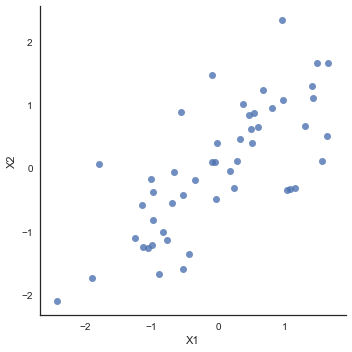

In [11]:
X_norm = normalize(X)
sns.lmplot('X1', 'X2',
          data=pd.DataFrame(X_norm, columns=['X1','X2']), fit_reg = False)
plt.show()

# covariance matrix $\Sigma$

In [12]:
Sigma = covariance_matrix(X_norm)
Sigma

array([[1.        , 0.73553038],
       [0.73553038, 1.        ]])

# PCA

In [13]:
U, S, V = pca(X_norm)

In [14]:
U

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [16]:
ul = U[0]

In [17]:
U

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

# project data to lower dimension

In [18]:
# show the 10 projected data
Z = project_data(X_norm, U, 1)
Z[: 10]

array([[ 1.49631261],
       [-0.92218067],
       [ 1.22439232],
       [ 1.64386173],
       [ 1.2732206 ],
       [-0.97681976],
       [ 1.26881187],
       [-2.34148278],
       [-0.02999141],
       [-0.78171789]])

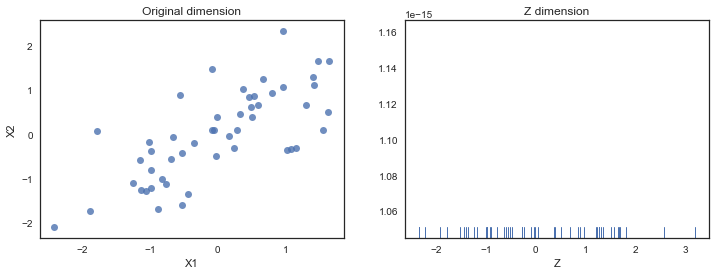

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

sns.regplot('X1', 'X2', 
           data=pd.DataFrame(X_norm, columns=['X1', 'X2']),
           fit_reg=False,
           ax=ax1)
ax1.set_title('Original dimension')

sns.rugplot(Z, ax=ax2)
ax2.set_xlabel('Z')
ax2.set_title('Z dimension')
plt.show()

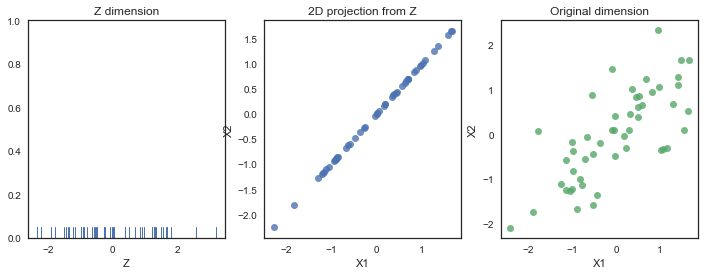

In [20]:
X_recover = recover_data(Z, U)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 4))

sns.rugplot(Z, ax=ax1)
ax1.set_title('Z dimension')
ax1.set_xlabel('Z')

sns.regplot('X1', 'X2', 
           data=pd.DataFrame(X_recover, columns=['X1', 'X2']),
           fit_reg=False,
           ax=ax2)
ax2.set_title("2D projection from Z")

sns.regplot('X1', 'X2', 
           data=pd.DataFrame(X_norm, columns=['X1', 'X2']),
           fit_reg=False,
           ax=ax3)
ax3.set_title('Original dimension')
plt.show()